[Reference](https://medium.com/lunartechai/a-comprehensive-guide-to-clustering-in-python-f9fb36a94a05)

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function for performing K-means
def KMeans_Algorithm(df,K):
    # randomly assign each observation to a cluster
    # obtain the centroids of the clusters
    # reassign observations to clusters with the closest cerntroid
    KMeans_model = KMeans(n_clusters=K,init = 'k-means++',max_iter = 300,
     random_state = 2021)
    KMeans_model.fit(df)
    # storing the centroids
    centroids = KMeans_model.cluster_centers_
    centroids_df = pd.DataFrame(centroids,columns = ["X","Y"])
    # getting the labels/classes
    labels = KMeans_model.labels_
    df = pd.DataFrame(df)
    df["labels"] = labels
    return(df)

# creating data for K-Means Clustering
df = np.random.randint(0,10,size = [100,2])
X1 = np.random.randint(0,4,size = [300,1])
X2 = np.random.uniform(0,10,size = [300,1])
df = np.append(X1,X2,axis = 1)
Clustered_df = KMeans_Algorithm(df = df,K =4)
df = pd.DataFrame(Clustered_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

# for observations with each type of labels from column 1 and 2
plt.scatter(df[df["labels"] == 0][0], df[df["labels"] == 0][1],
c='black', label='cluster 1')
plt.scatter(df[df["labels"] == 1][0], df[df["labels"] == 1][1],
c='green', label='cluster 2')
plt.scatter(df[df["labels"] == 2][0], df[df["labels"] == 2][1],
c='red', label='cluster 3')
plt.scatter(df[df["labels"] == 3][0], df[df["labels"] == 3][1],
c='y', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='centroid')
plt.legend()
plt.xlim([-2, 6])
plt.ylim([0, 10])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of clustered data')
ax.set_aspect('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

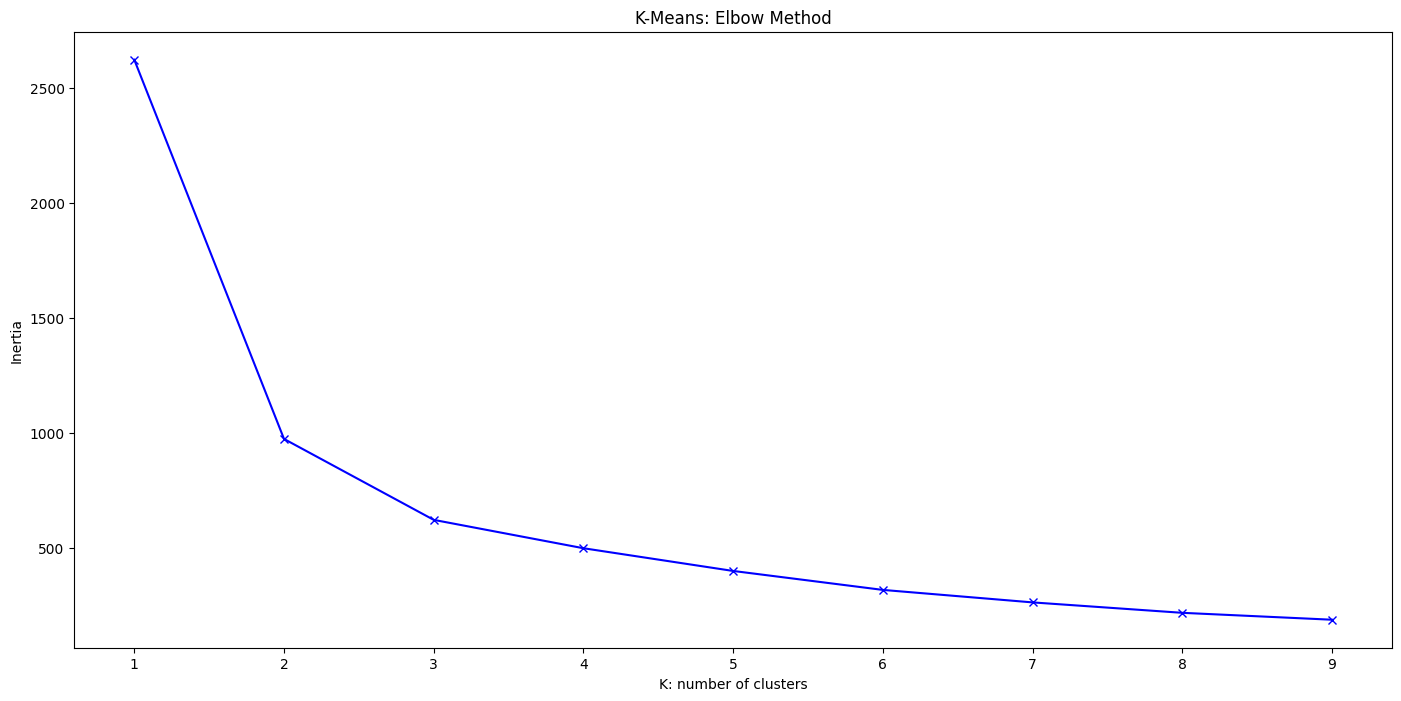

In [10]:
# creating data for K-Means Clustering
df = np.random.randint(0,10,size = [100,2])
X1 = np.random.randint(0,4,size = [300,1])
X2 = np.random.uniform(0,10,size = [300,1])
df = np.append(X1,X2,axis = 1)

def Elbow_Method(df):
    inertia = []
    # considering K = 1,2,...,10 as K
    K = range(1, 10)
    for k in K:
        KMeans_Model = KMeans(n_clusters=k, random_state = 2022)
        KMeans_Model.fit(df)
        inertia.append(KMeans_Model.inertia_)
    return(inertia)

K = range(1, 10)
inertia = Elbow_Method(df)
plt.figure(figsize = (17,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel("K: number of clusters")
plt.ylabel("Inertia")
plt.title("K-Means: Elbow Method")
plt.show()

In [11]:
import scipy.cluster.hierarchy as HieraarchicalClustering
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

# creating data for Hierarchical Clustering
df = np.random.randint(0,10,size = [100,2])
X1 = np.random.randint(0,4,size = [300,1])
X2 = np.random.uniform(0,10,size = [300,1])
df = np.append(X1,X2,axis = 1)
hierCl = HieraarchicalClustering.linkage(df, method='ward')

Hcl= AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')
Hcl_fitted = Hcl.fit_predict(df)
df = pd.DataFrame(df)
df["labels"] = Hcl_fitted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


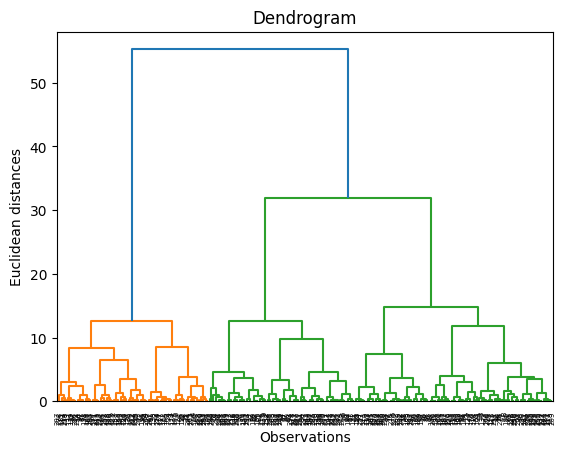

In [12]:
# getting the dendogram to pick right number of clusters
dendrogram = HieraarchicalClustering.dendrogram(hierCl)
plt.title('Dendrogram')
plt.xlabel("Observations")
plt.ylabel('Euclidean distances')
plt.show()

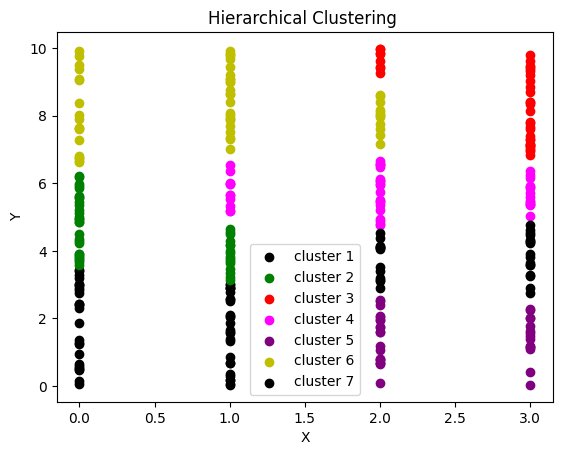

In [13]:
# Visualizing the clustered data
plt.scatter(df[df["labels"] == 0][0], df[df["labels"] == 0][1],
c='black', label='cluster 1')
plt.scatter(df[df["labels"] == 1][0], df[df["labels"] == 1][1],
c='green', label='cluster 2')
plt.scatter(df[df["labels"] == 2][0], df[df["labels"] == 2][1],
c='red', label='cluster 3')
plt.scatter(df[df["labels"] == 3][0], df[df["labels"] == 3][1],
c='magenta', label='cluster 4')
plt.scatter(df[df["labels"] ==4][0], df[df["labels"] == 4][1],
c='purple', label='cluster 5')
plt.scatter(df[df["labels"] == 5][0], df[df["labels"] == 5][1],
c='y', label='cluster 6')
plt.scatter(df[df["labels"] ==6][0], df[df["labels"] == 6][1],
c='black', label='cluster 7')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hierarchical Clustering ')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate some sample data
X, _ = make_moons(n_samples=500, noise=0.05, random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

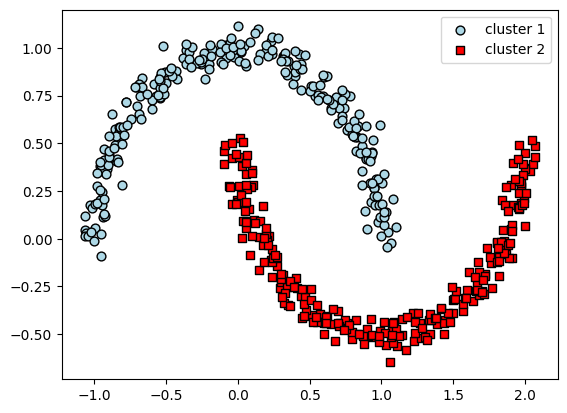

In [15]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='cluster 2')
plt.legend()
plt.show()

<ipython-input-16-a8f3de10c8a3>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('jet', 10))


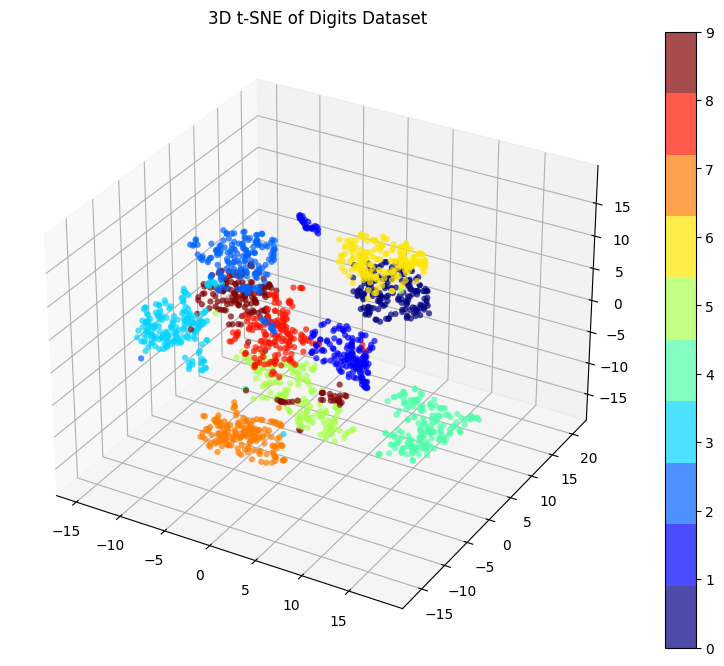

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=0)
X_tsne = tsne.fit_transform(X)

# Visualize the results on 3D plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(scatter)
plt.title("3D t-SNE of Digits Dataset")
plt.show()